## Problem 2

### Part a

In [ ]:
# Import libraries and packages
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define gradient of function f
def grad_f (x, y):
  return np.array([[((4 / 3) * (x ** 3)) + (4 * x) - (4 * y ** 2)], 
                   [(2 * (y ** 3)) + (4 * y) - (8 * x * y)]])

In [ ]:
# Implement gradient descent
def grad_desc (x, y, n, lr):
  minima = np.array([[x], [y]])
  for i in range(n):
    minima = minima - lr * grad_f(minima[0][0], minima[1][0])
  return minima

### Part b

In [ ]:
# Define variables
lr = 10 ** -3
n = 10 ** 6
tr = 10 ** -6

# Define function to check condition
def cond(x0, y0, x_min, y_min, n, lr, tr):
  approx = grad_desc (x0, y0, n, lr)
  diff = abs(approx[0][0] - x_min) + abs(approx[1][0] - y_min)
  if diff < tr:
    msg = 'The point (' + str(x0) + ', ' + str(y0) + ') converges to local minima (' + str(x_min) + ', ' + str(y_min) + ').'
  else:
    msg = 'The point (' + str(x0) + ', ' + str(y0) + ') does NOT converge to local minima (' + str(x_min) + ', ' + str(y_min) + ').'
  return msg

In [ ]:
# Try for each local minima

x0, y0, x_min, y_min,  = -6, -1, 0, 0
print(cond(x0, y0, x_min, y_min, n, lr, tr))

x0, y0, x_min, y_min,  = 4, 5, 2.5842254, 2.8873693
print(cond(x0, y0, x_min, y_min, n, lr, tr))

x0, y0, x_min, y_min,  = 10, -12, 2.5842254, -2.8873693
print(cond(x0, y0, x_min, y_min, n, lr, tr))

The point (-6, -1) converges to local minima (0, 0).
The point (4, 5) converges to local minima (2.5842254, 2.8873693).
The point (10, -12) converges to local minima (2.5842254, -2.8873693).


In [ ]:
# Find values of (x0, y0) that do not converge to a local minima

x0, y0, x_min, y_min,  = 0.705, 0.907, 0, 0
print(cond(x0, y0, x_min, y_min, n, lr, tr))

'''I could not find any values of (x0, y0) that do not converge to a local minima'''

The point (0.705, 0.907) converges to local minima (0, 0).


'I could not find any values of (x0, y0) that do not converge to a local minima'

### Part c

In [ ]:
# Define function g for local minima (0,0)

def g (x, y, lr):
  x_min = 0
  y_min = 0
  error = 1
  n = 0
  minima = np.array([[x], [y]])
  while (error > 10 ** -6 and n < 10 ** 6):
    minima = minima - lr * grad_f(minima[0][0], minima[1][0])
    error = abs(minima[0][0] - x_min) + abs(minima[1][0] - y_min)
    n += 1
  return n

# Define function h(lr)

def h (lr):
  accum = 0  
  for i in range(-5, 6):
    for j in range(-5, 6):
      accum += g(i, j, lr)
  return (1 / (11 * 11)) * accum

In [ ]:
# Find values for the plot

lr = list(np.linspace(10 ** -4, 10 ** -2, 20))
h_lr = []

for value in lr:
  h_lr.append(h(value))

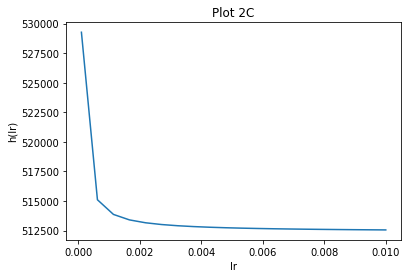

In [ ]:
# Plot results

plt.figure()
plt.plot(lr, h_lr)
plt.xlabel('lr')
plt.ylabel('h(lr)')
plt.title('Plot 2C')
plt.show()